In [1]:
import anndata as ad 
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scanpy
import seaborn as sns 
import spikeinterface.core as sc
import spikeinterface.extractors as se
import spikeinterface.postprocessing as spost

n_ms_per_s = 1000
window_ms, bin_ms = 100, 1.5

In [2]:
curated_units = {
    # subject, surgery_date, n_segment
    ('1_5', '20230627'): {
        # (shank, threshold): ([less confident units], [more confident units])
        (0, 3.0): ([], []),
        (1, 3.0): ([1, 2, 4, 6], [5]),
        (2, 3.0): ([2], [1, 3, 4, 5, 8]),
        (3, 3.0): ([], [1, 2, 3, 4, 5, 6]),
        (4, 3.0): ([6, 22], [1, 2, 3, 15, 20])
    }
}

channel_indices = np.array([
    [ 5,  3,  1,  7,  9, 11], # 5
    [17, 15, 13, 19, 21, 23], # 4
    [29, 27, 25, 28, 26, 24], # 3
    [18, 20, 22, 16, 14, 12], # 2
    [ 6,  8, 10,  4,  2,  0], # 1
])
inter_electrode_distance = 50
n_total_week = 18 
n_shank = 5
n_channel = 6
weeks_plotted = [2, 6, 10, 14, 18]

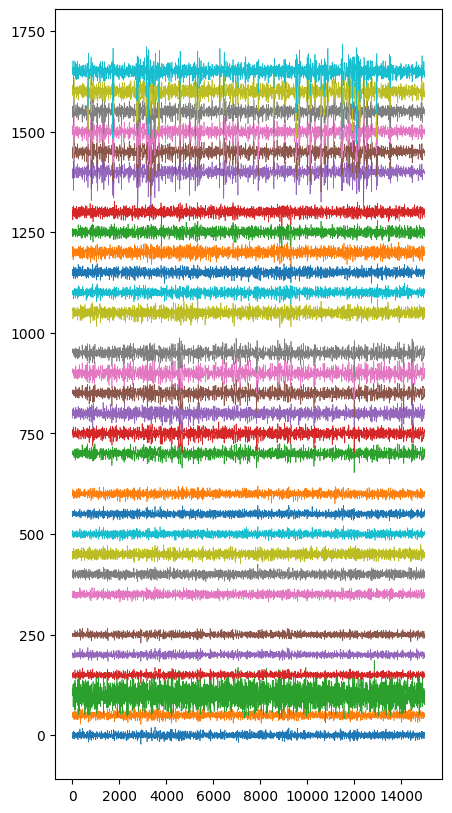

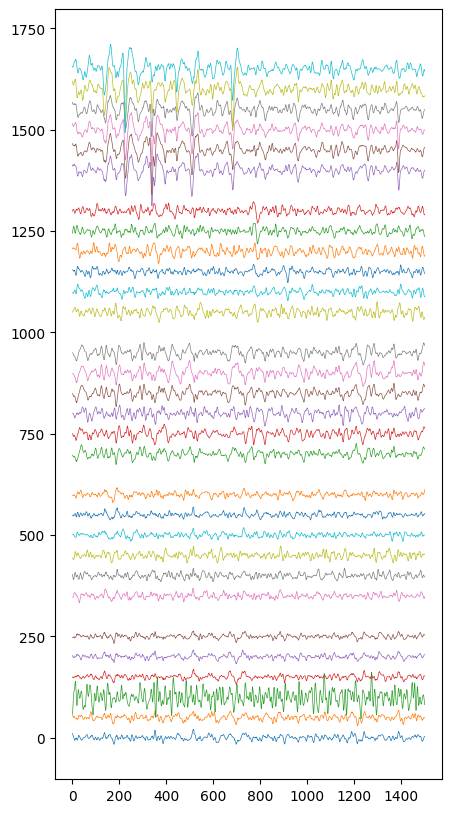

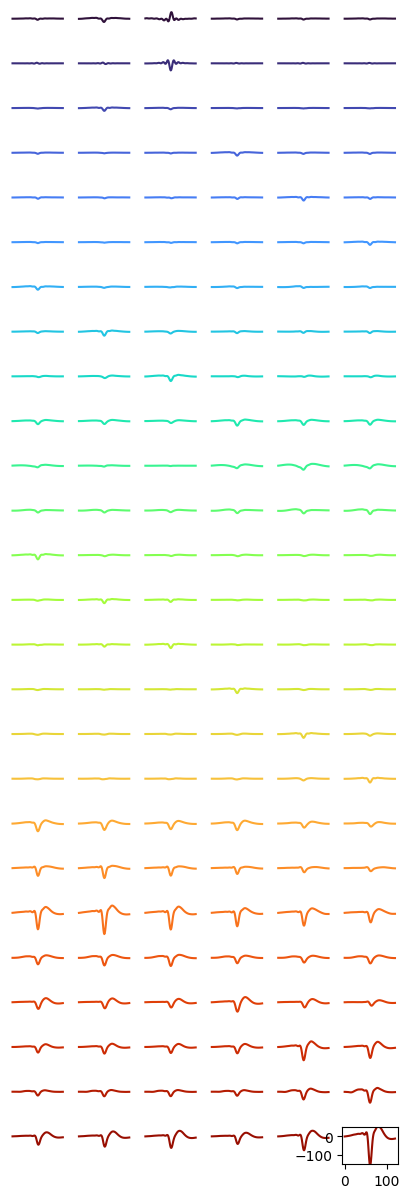

In [3]:
subject = '1_5'
segment = 3
recordings = [sc.load_extractor(f'data/processed/{subject}/shank{shank}/recording/segment{segment}') for shank in range(n_shank)]

shank_gap = 100
trace_gap = 50

zoom_out_start_frame = int(674.5*recordings[0].sampling_frequency)
zoom_out_end_frame = int(675*recordings[0].sampling_frequency)

plt.figure(figsize=(5, 10))
for shank in range(n_shank):
    zoom_out_traces = recordings[shank].get_traces(start_frame=zoom_out_start_frame, end_frame=zoom_out_end_frame).T 
    for trace_index, trace in enumerate(zoom_out_traces):
        plt.plot(trace + trace_gap * (trace_index + shank * n_shank) + shank_gap * shank, linewidth=0.5)
plt.show()
plt.close()

zoom_in_start_frame = int(674.6*recordings[0].sampling_frequency)
zoom_in_end_frame = int(674.65*recordings[0].sampling_frequency)

plt.figure(figsize=(5, 10))
for shank in range(n_shank):
    zoom_in_traces = recordings[shank].get_traces(start_frame=zoom_in_start_frame, end_frame=zoom_in_end_frame).T 
    for trace_index, trace in enumerate(zoom_in_traces):
        plt.plot(trace + trace_gap * (trace_index + shank * n_shank) + shank_gap * shank, linewidth=0.5)
plt.show()
plt.close()

sortings = [se.NpzSortingExtractor(f'data/processed/{subject}/shank{shank}/sorting3.0/sorter_output/segment{segment}_firings.npz') for shank in range(n_shank)]
waveform_extractors = [sc.load_waveforms(folder=f'data/processed/{subject}/shank{shank}/waveform3.0/segment{segment}', with_recording=False, sorting=sortings[shank]) for shank in range(n_shank)]

zoomed_templates = []
for shank in range(n_shank):
    zoomed_unit_ids = []
    for unit_id in sortings[shank].unit_ids:
        if sortings[shank].get_unit_spike_train(unit_id=unit_id, start_frame=zoom_out_start_frame, end_frame=zoom_out_end_frame).size > 0:
            zoomed_unit_ids.append(unit_id)

    zoomed_templates.append(waveform_extractors[shank].get_all_templates(unit_ids=zoomed_unit_ids))
zoomed_templates = np.vstack(zoomed_templates)

gap = 500
ncols = 6 # n_channels
nrows = len(zoomed_templates)

plt.figure(figsize=(5, 15))
for unit_index in range(nrows):
    for channel_index in range(ncols):
        ax = plt.subplot(nrows, ncols, unit_index*ncols+channel_index+1)
        ax.plot(zoomed_templates[unit_index, :, channel_index], color=plt.cm.turbo(unit_index/nrows))
        ax.set_ylim(-150, 50)
        ax.set_axis_off()
ax.set_axis_on()
plt.show()
plt.close()

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/home/xinh

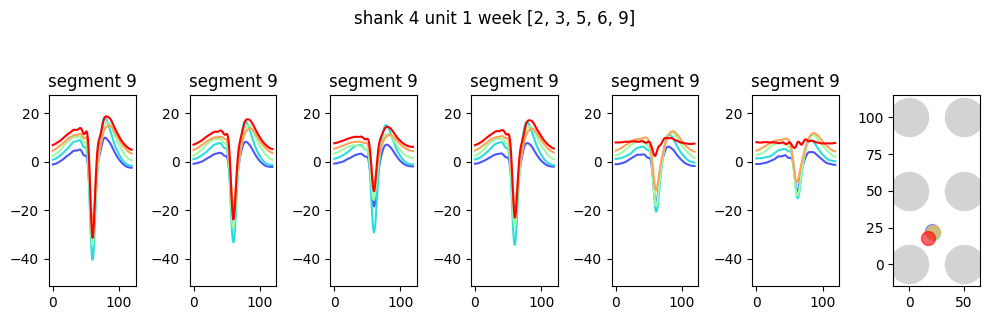

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/home/xinh

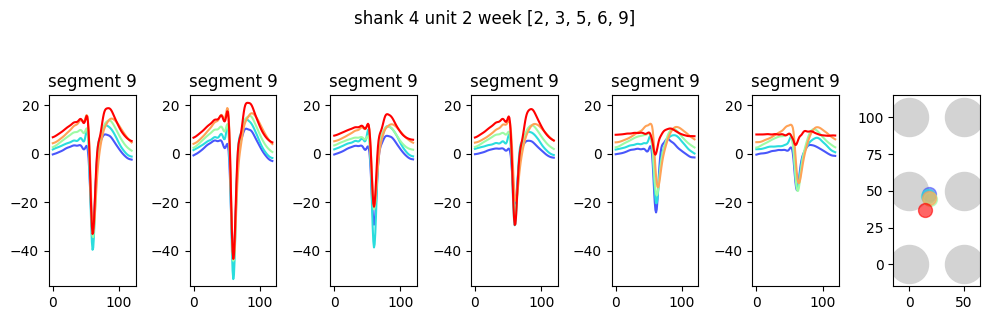

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/home/xinh

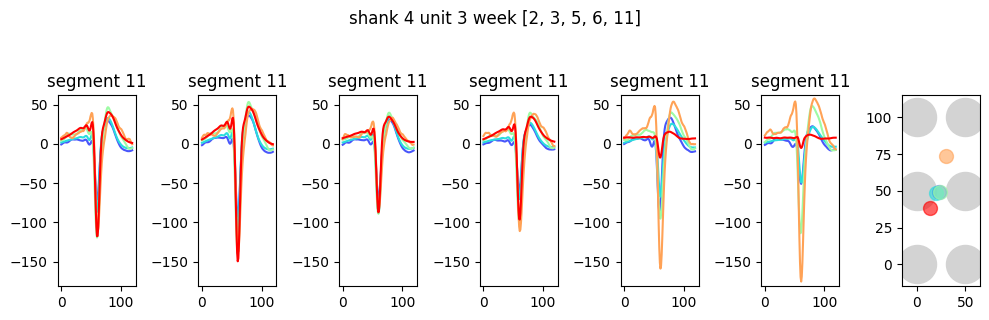

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/home/xinh

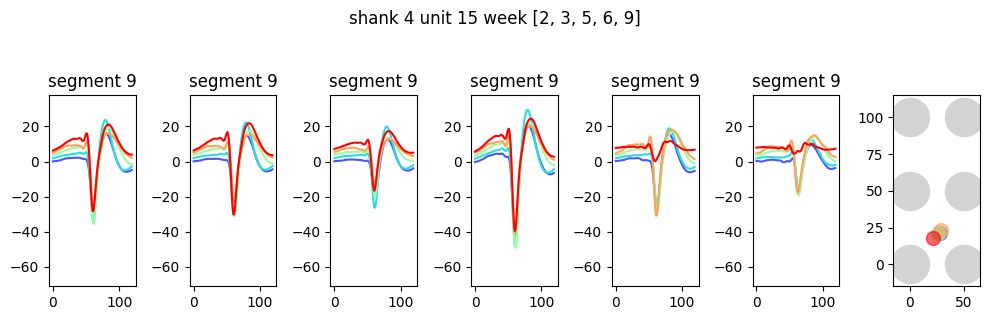

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/home/xinh

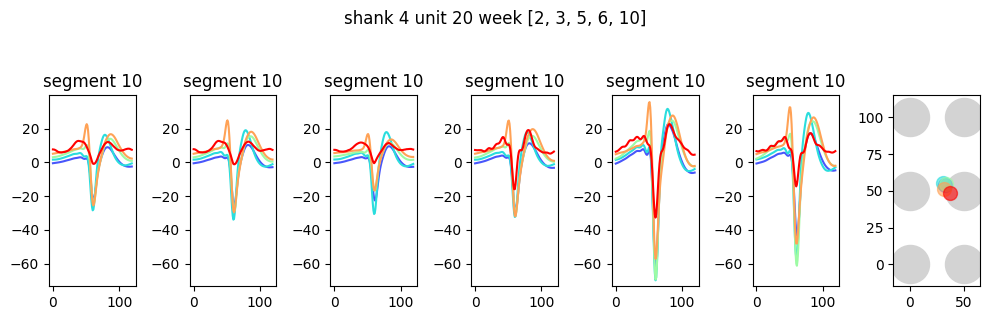

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/home/xinh

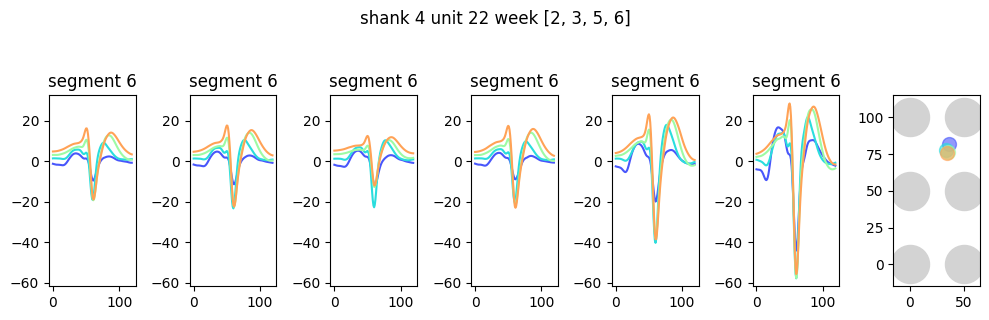

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/tmp/ipyke

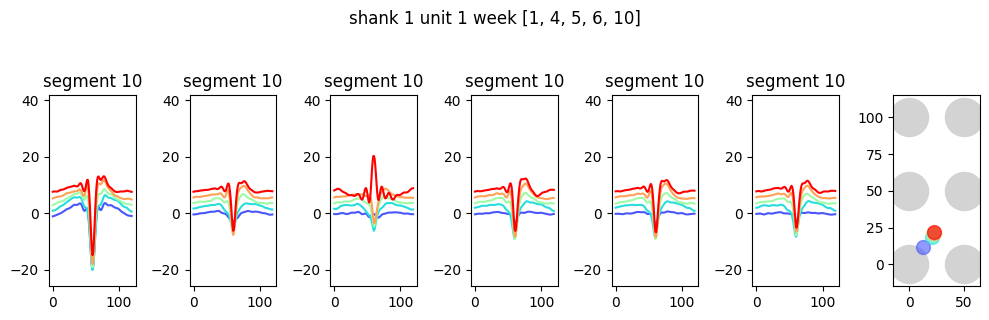

/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

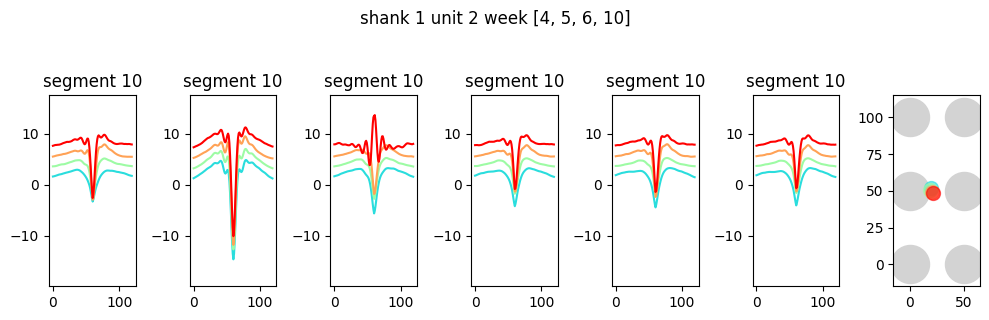

/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

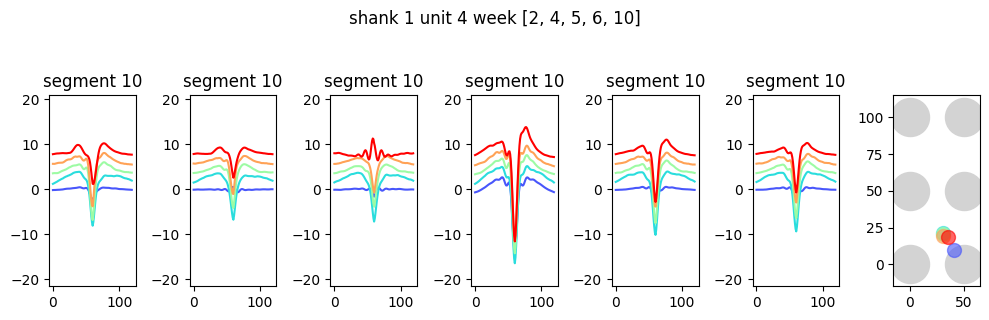

/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

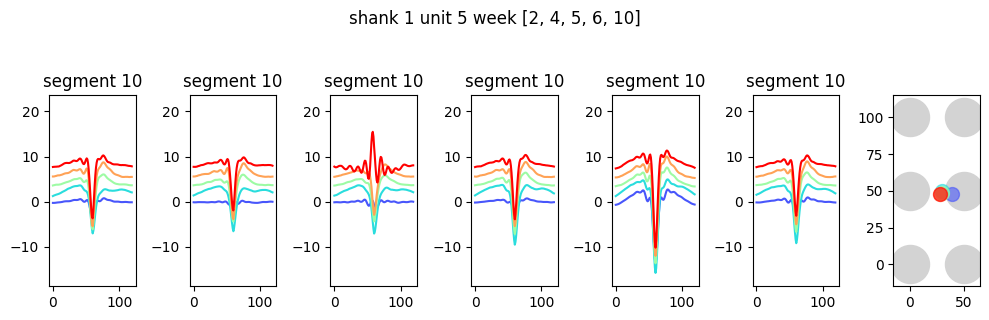

/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

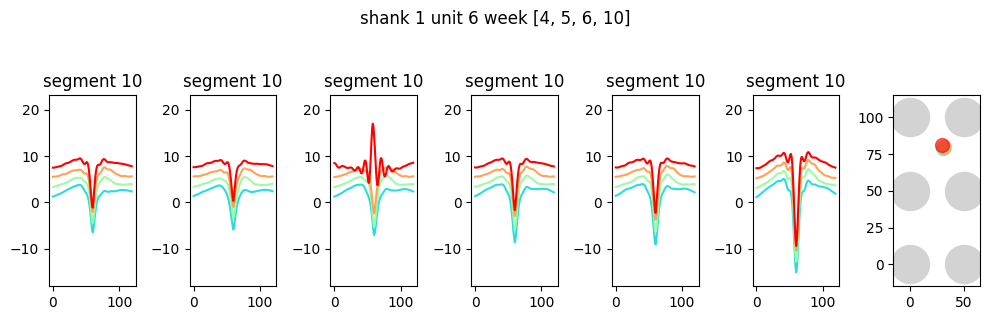

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/home/xinh

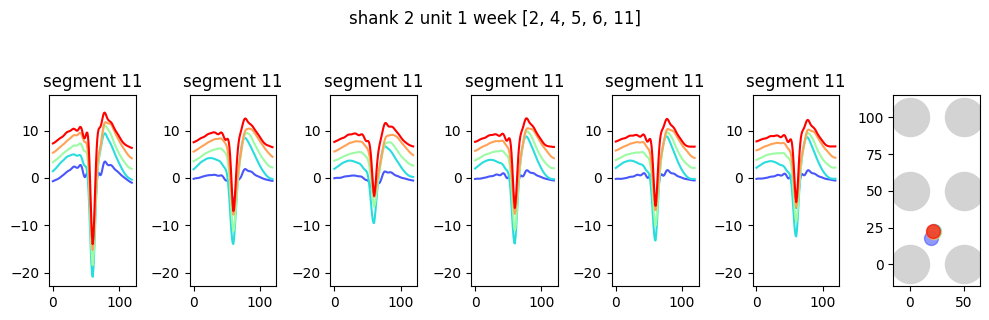

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/home/xinh

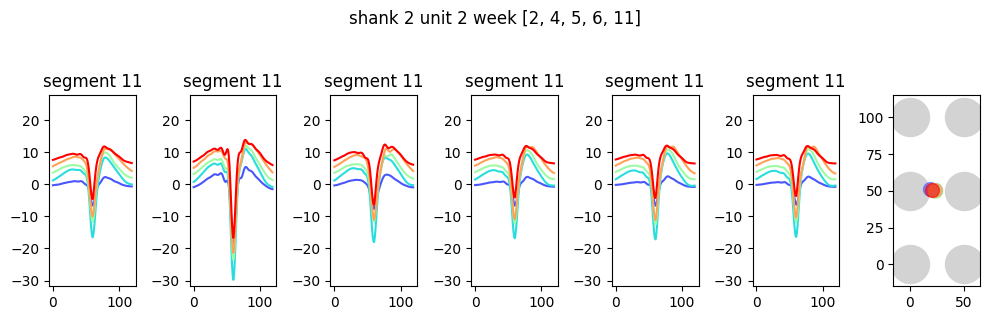

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/home/xinh

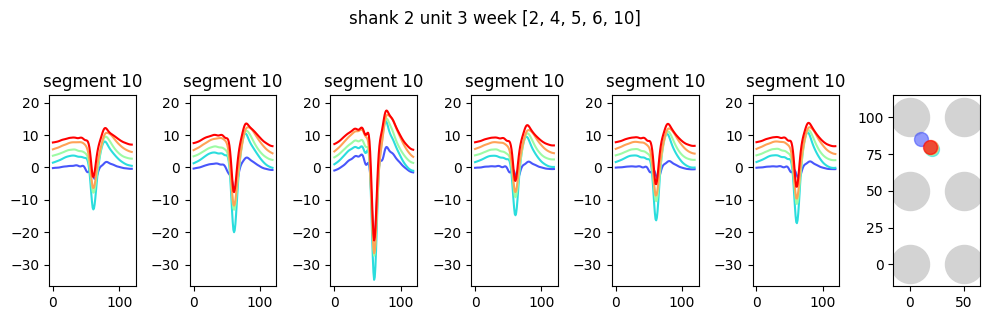

/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipyke

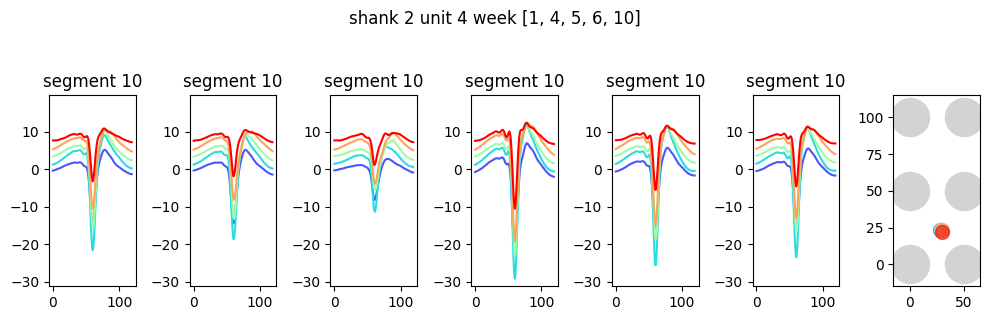

/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipyke

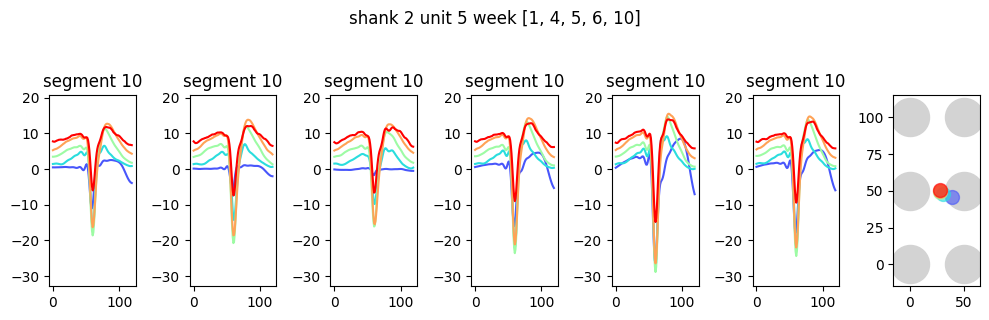

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/spikeinterface/postprocessing/template_metrics.py:223: RuntimeWarning: invalid value encountered in scalar divide
  ptratio = template[peak_idx] / template[trough_idx]
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/home/xinh

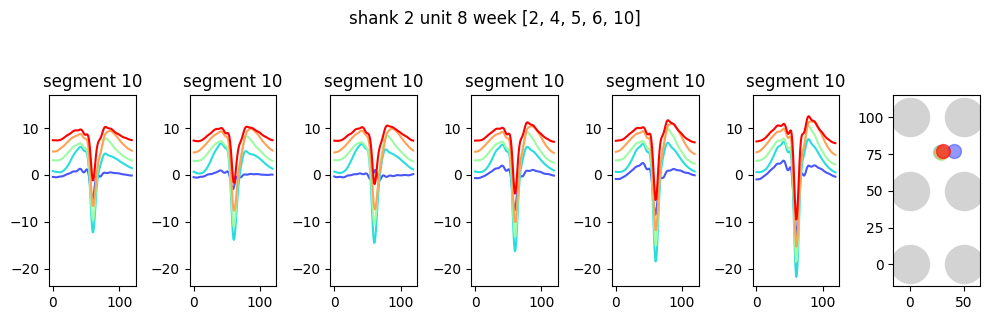

/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

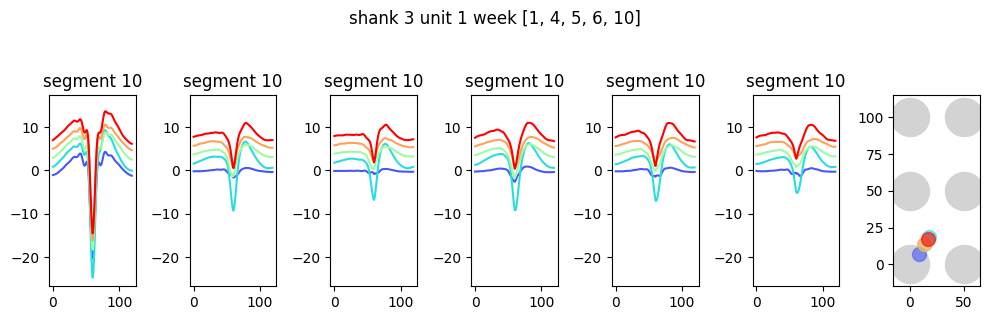

/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

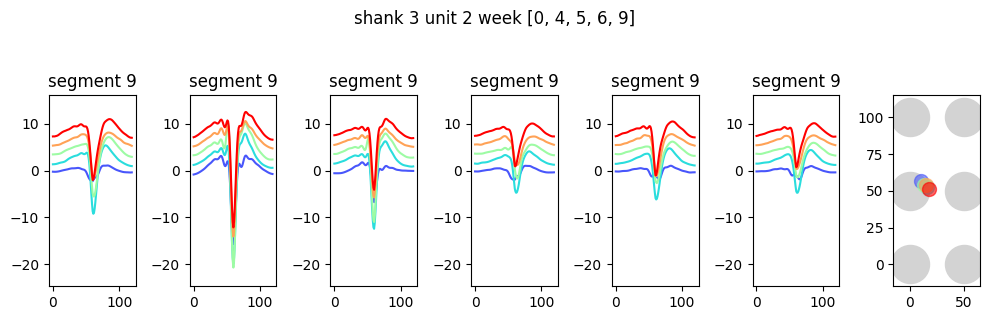

/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

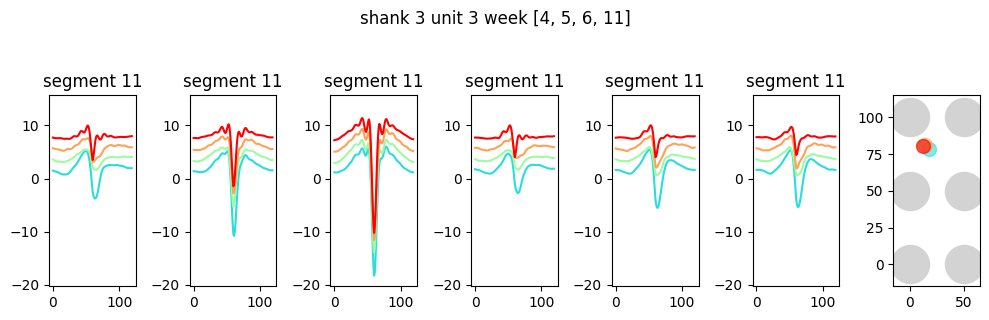

/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

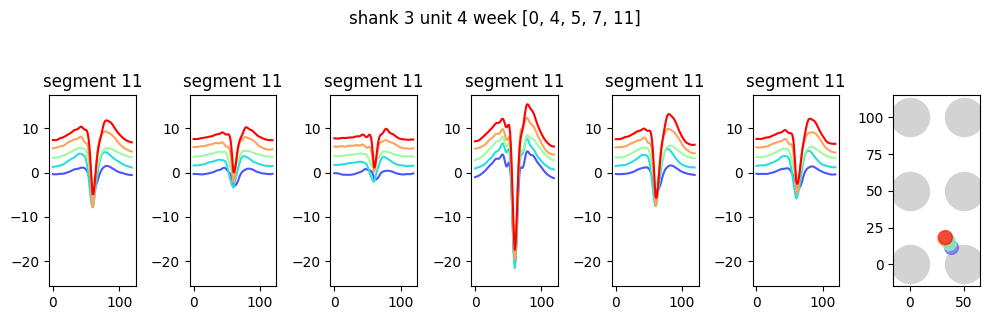

/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

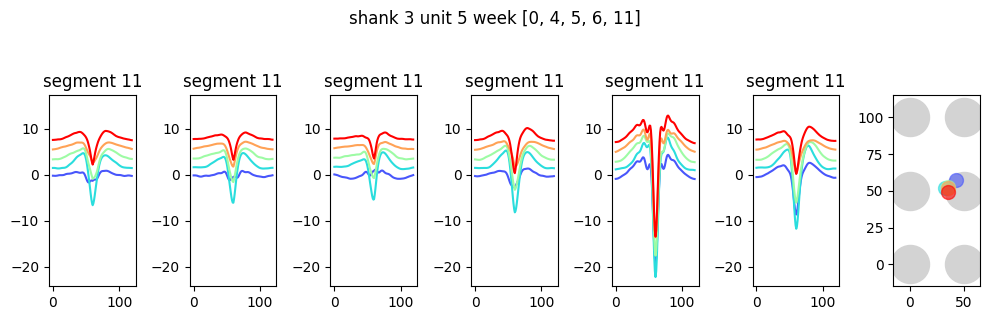

/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['lapse'] = segment_lapses[segment]
/tmp/ipykernel_95847/1497767116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_features['unit_id'] = f'{shank}-{unit_id}'
/tmp/ipykernel_95847/1497767116.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

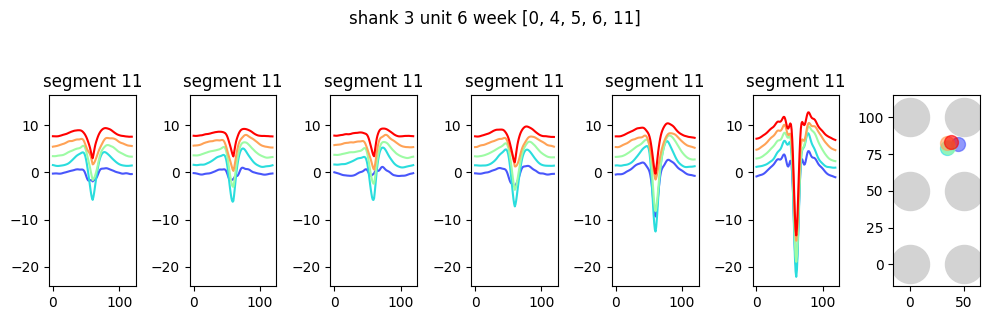

In [4]:
threshold = 3.0
template_gap = 2
curated_units = {
    # subject, surgery_date, n_segment
    ('1_5', '20230627', 12): {
        # (shank, threshold): ([less confident units], [more confident units])
        4: {
            1: [2, 3, 5, 6, 9],
            2: [2, 3, 5, 6, 9],
            3: [2, 3, 5, 6, 11],
            15: [2, 3, 5, 6, 9],
            20: [2, 3, 5, 6, 10],
            22: [2, 3, 5, 6],
        },
        0: {
        },
        1: {
            1: [1, 4, 5, 6, 10],
            2: [   4, 5, 6, 10],
            4: [2, 4, 5, 6, 10],
            5: [2, 4, 5, 6, 10],
            6: [   4, 5, 6, 10],
        },
        2: {
            1: [2, 4, 5, 6, 11],
            2: [2, 4, 5, 6, 11],
            3: [2, 4, 5, 6, 10],
            4: [1, 4, 5, 6, 10],
            5: [1, 4, 5, 6, 10],
            8: [2, 4, 5, 6, 10],
        },
        3: {
            1: [1, 4, 5, 6, 10],
            2: [0, 4, 5, 6, 9],
            3: [   4, 5, 6, 11],
            4: [0, 4, 5, 7, 11],
            5: [0, 4, 5, 6, 11],
            6: [0, 4, 5, 6, 11],
        },
    }
}

features = []
for (subject, surgery_date, n_segment), subject_curated_units in curated_units.items():
    surgery_date = datetime.datetime.strptime(surgery_date, '%Y%m%d')
    for shank, shank_curated_units in subject_curated_units.items():
        for unit_id, unit_segments in shank_curated_units.items():    
            session_info = pd.read_csv(f'data/processed/{subject}/shank{shank}/session_info.csv')
            segment_lapses = [2+4*round(((datetime.datetime.strptime(path.split('/')[3], '%Y%m%d')-surgery_date).days - 14) / 28) for path in session_info['segment_path']]
            recordings = [sc.load_extractor(f'data/processed/{subject}/shank{shank}/recording/segment{segment}') for segment in range(n_segment)]
            sortings = [se.NpzSortingExtractor(f'data/processed/{subject}/shank{shank}/sorting{threshold}/sorter_output/segment{segment}_firings.npz') for segment in range(n_segment)]
            waveform_extractors = [sc.load_waveforms(folder=f'data/processed/{subject}/shank{shank}/waveform{threshold}/segment{segment}', with_recording=False, sorting=sortings[shank]) for segment in range(n_segment)]
            templates = np.array([waveform_extractors[segment].get_template(unit_id=unit_id) for segment in range(n_segment)])
            unit_locations = np.array([spost.compute_unit_locations(waveform_extractors[segment], load_if_exists=True)[unit_id-1] for segment in range(n_segment)])
            
            extremum_channels = np.array([sc.get_template_extremum_channel(waveform_extractors[segment], peak_sign='neg')[unit_id] for segment in range(n_segment)])
            extremum_channel = np.where(channel_indices[shank] == extremum_channels[unit_segments[0]])[0].item()
            for segment in unit_segments:
                unit_features = spost.compute_template_metrics(waveform_extractors[segment], peak_sign='neg').iloc[extremum_channel:extremum_channel+1]
                unit_features['lapse'] = segment_lapses[segment]
                unit_features['unit_id'] = f'{shank}-{unit_id}'
                features.append(unit_features)

            fig = plt.figure(figsize=(10, 3))
            for segment in unit_segments:
                row = weeks_plotted.index(segment_lapses[segment])
                color = plt.cm.rainbow(segment_lapses[segment]/n_total_week)
                for channel in range(n_channel):
                    ax = plt.subplot(1, n_channel + 1, channel + 1)
                    ax.plot(templates[segment, :, channel] + row * template_gap, color=color)
                    ax.set_title(f'segment {segment}')
                    ax.set_ylim(templates.min(), templates.max()+len(weeks_plotted)*template_gap)
            ax = plt.subplot(1, n_channel + 1, n_channel + 1)
            ax.scatter(
                [0, 0, 0, inter_electrode_distance, inter_electrode_distance, inter_electrode_distance],
                [0, inter_electrode_distance, inter_electrode_distance*2, 0, inter_electrode_distance, inter_electrode_distance*2],
                s=750, color='lightgray')
            # for unit_location
            for segment in unit_segments:
                color = plt.cm.rainbow(segment_lapses[segment]/n_total_week)
                ax.scatter(unit_locations[segment, 0], unit_locations[segment, 1], color=color, alpha=0.6, s=100)
            ax.set_xlim(-15, 65)
            ax.set_ylim(-15, 115)
            fig.suptitle(f'shank {shank} unit {unit_id} week {unit_segments}', y=1.05)
            plt.tight_layout()
            plt.show()
            plt.close()
features = pd.concat(features, ignore_index=True)

<Axes: xlabel='lapse', ylabel='recovery_slope'>

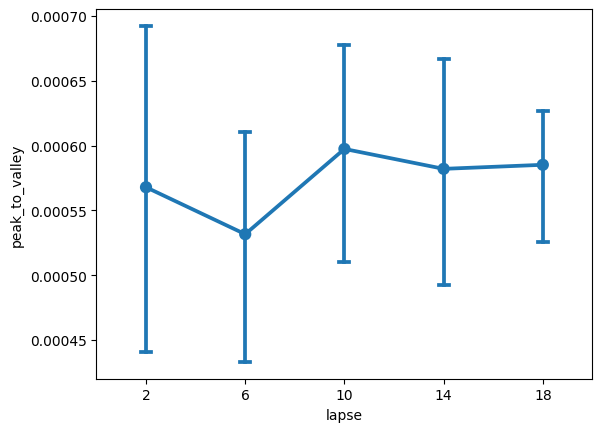

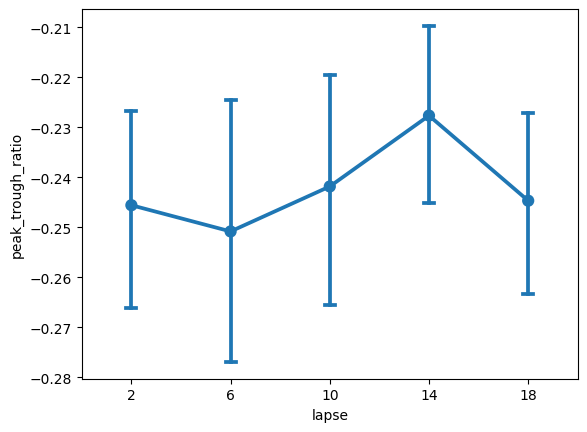

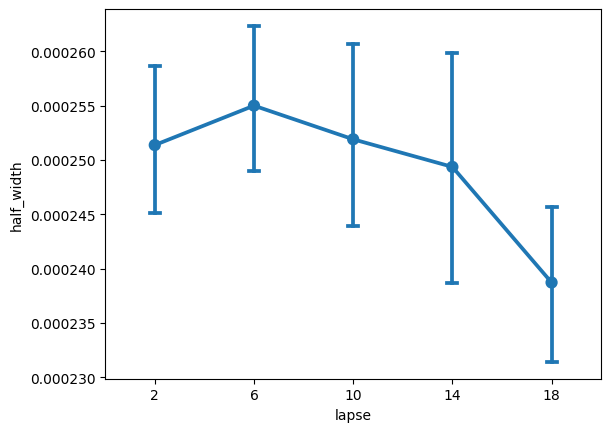

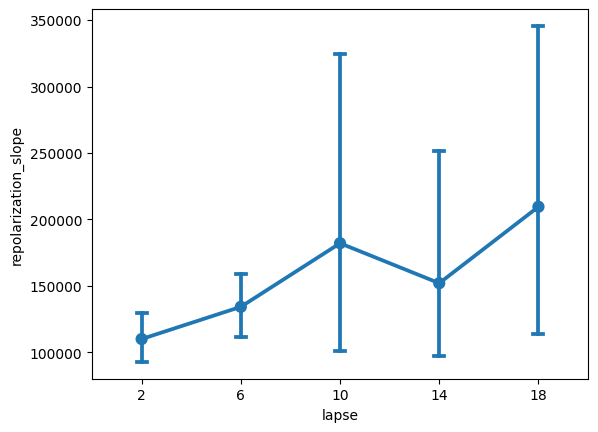

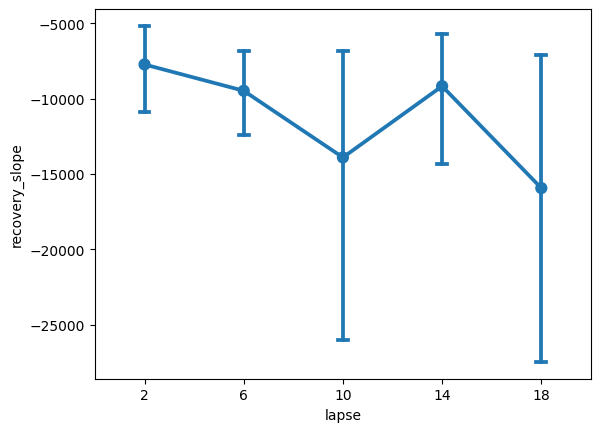

In [5]:
plt.figure()
sns.pointplot(data=features, x='lapse', y='peak_to_valley', capsize=0.1)

plt.figure()
sns.pointplot(data=features, x='lapse', y='peak_trough_ratio', capsize=0.1)

plt.figure()
sns.pointplot(data=features, x='lapse', y='half_width', capsize=0.1)

plt.figure()
sns.pointplot(data=features, x='lapse', y='repolarization_slope', capsize=0.1)

plt.figure()
sns.pointplot(data=features, x='lapse', y='recovery_slope', capsize=0.1)